In [1]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np

## Helper funcs

In [2]:
def greater_or_equal(a, b):
    return a >= b
def greater(a, b):
    return a > b
def smaller(a, b):
    return a < b
def smaller_or_equal(a, b):
    return a <= b

interval_type_map = {
    "[]": [greater_or_equal, smaller_or_equal],
    "(]": [greater, smaller_or_equal],
    "()": [greater, smaller],
    "[)": [greater_or_equal, smaller]
}

In [13]:
def get_pre_img(f, domain: List, image_intervals: List):
    """
    Encontrar la preimagen dado los intervalos de la imagen.
    Para cada punto del dominio, si al aplicarle la función f, 
    el resultado se encuentra dentro de alguno de los intervalos de
    la imagen, ese punto es preimagen.
    Args:
        f: Función que mapea de Dominio -> Imagen
        domain: Los puntos del dominio
        image_intervals: Los intervalos de la imagen
    """
    preimage = []
    for domain_point in domain:
        for image_interval in image_intervals:

            lim_inf, lim_sup, interval_type = image_interval

            func_lim_inf, func_lim_sup = interval_type_map[interval_type]

            # Probar si f(domain_point) esta en algun intervalo de image_interval
            if func_lim_inf(f(domain_point), lim_inf) \
            and func_lim_sup(f(domain_point), lim_sup):
                preimage.append(domain_point)
                break
                
    return preimage

def is_open_cover(f, domain, image_intervals):
    """
    Probar si la imagen es cubierta del dominio.
    El numero de elementos de la pre_imagen debe ser el mismo que del dominio.
    i.e. Todo dominio pudo ser mappeado a un punto dentro de la imagen.
    Args:
        f: Función que mapea de Dominio -> Imagen
        domain: Los puntos del dominio
        image_intervals: Los intervalos de la imagen
    """
    pre_img = get_pre_img(f, domain, image_intervals)

    return len(pre_img) == len(domain)

## Ejercicio 5

Definir el dominio

In [4]:
theta = np.linspace(0, 2*np.pi, 1000)
radius = np.sqrt(5)

domain = [(radius * np.cos(t), radius * np.sin(t)) for t in theta]

Graficando el dominio

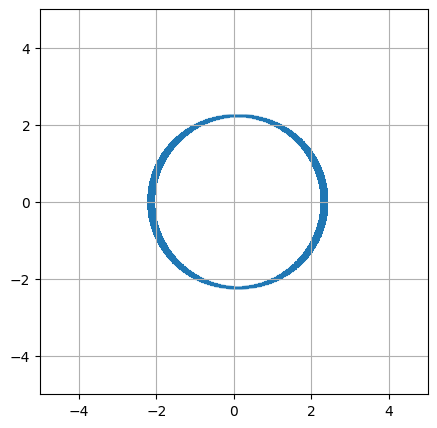

In [5]:
plt.figure(figsize=(5,5))
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()


x = [pt[0] for pt in domain]
y = [pt[1] for pt in domain]
plt.scatter(x,y, marker=1)

Definir los intervalos de imagen

In [6]:
# f: D -> I
def f(point):
    x, y = point
    return x

image_intervals = [[-1, -0.5, "[)"], [-0.6, 0.2, "()"], [-0.2, 0.6, "()"], [0.6, 1, "(]"]]
pre_image = get_pre_img(f, domain, image_intervals)

Probar si es cubierta abierta

In [7]:
is_open_cover(f, domain, image_intervals)

False

Graficando la preimagen de los intervalos dados por `
image_intervals`

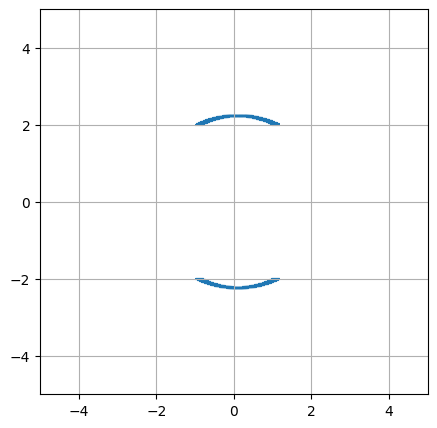

In [8]:
plt.figure(figsize=(5,5))
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

x = [pt[0] for pt in pre_image]
y = [pt[1] for pt in pre_image]
plt.scatter(x,y, marker=1);

## Ejercicio 6

Definir el dominio

In [9]:
theta = np.linspace(0, 2*np.pi, 1000)
radius = np.sqrt(5)

domain = [(radius * np.cos(t), radius * np.sin(t)) for t in theta]

x = [pt[0] for pt in domain]
y = [pt[1] for pt in domain]

Definir los intervalos de imagen

In [10]:
# f: D -> I
def g(point):
    x, y = point
    return 3 * np.power(x, 2) + 2 * y

min_g = min(map(g, domain))
max_g = max(map(g, domain))

image_intervals = [[min_g, 0, "[)"], [-1, -1, "()"], [0, max_g, "(]"]]

pre_image = get_pre_img(f, domain, image_intervals)

Probar si es cubierta abierta

In [11]:
is_open_cover(f, domain, image_intervals)

True

Graficando la preimagen de los intervalos dados por `
image_intervals`

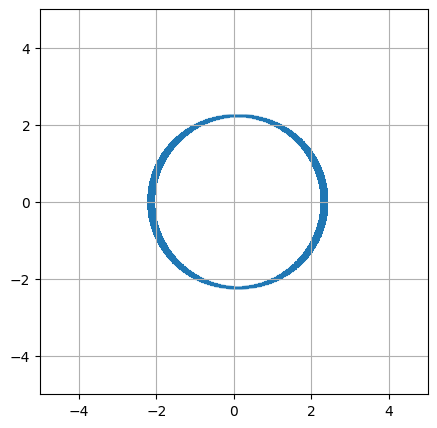

In [12]:
plt.figure(figsize=(5,5))
plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid()

x = [pt[0] for pt in pre_image]
y = [pt[1] for pt in pre_image]
plt.scatter(x,y, marker=1);